<a href="https://colab.research.google.com/github/Riddhimaniitk/British-Airways-Data-Science/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

Web scraping and analysis
This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
! pip install pandas
! pip install requests
! pip install BeautifulSoup

In [ ]:
import requests

In [ ]:
url = "https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100"

In [ ]:
response = requests.get(url)
response.status_code

200

In [ ]:
page_content = response.text
len(page_content)

626700

In [ ]:
with open('webpage.html', 'w') as f:
    f.write(page_content)

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
doc = BeautifulSoup(response.text, 'html.parser')
type(doc)

bs4.BeautifulSoup

In [ ]:
doc.find('title')

<title>British Airways Customer Reviews - SKYTRAX</title>

In [ ]:
def get_page(url):
    response = requests.get(url)

    # download was sucessful
    if response.status_code != 200:
        raise Exception('Unable to download page {}'.format(url))

    # Get the page HTML
    page_content = response.text

    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [ ]:
doc = get_page(url)

In [ ]:
get_page("https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100")

In [ ]:
tags = doc.find_all('div', {'class': "text_content"})
len(tags)

100

In [ ]:
def get_rev(doc):
    tags = doc.find_all('div', {'class': "text_content"})
    return [tag.text.strip() for tag in tags]

In [ ]:
reviews = get_rev(doc)
len(reviews)
reviews[:3]

['✅ Trip Verified |  My family flew from Washington to London on a British Airways A380, we were able to secure seats on the upper deck for a pretty hefty fee. Our flight was unfortunately delayed by 2 hrs from 2245 to 0120 causing us to miss a connection from Gatwick to Turin and making it so that no lounges were open by the time we got to the airport. Onboard I sat in a window seat which had a nice luggage bin which was very convenient for all my stuff. In flight entertainment system didn’t work very well, the touchscreen was disabled and the controller was quite glitchy and hard to use, it could use updating. The food for dinner was decent, they had pasta with tomato sauce which tasted good by airline standards. The seat was pretty comfortable, and the flight was smooth. After we missed our connection and we’re stuck behind security for 2 hrs waiting for escorts, they rebooked us on a flight from Heathrow to Milan the next day, gave us free bus tickets to Heathrow, gave us a free ho

In [ ]:
def get_user(doc):
    users = doc.find_all('span', {'itemprop': "name"})
    return [user.text.strip() for user in users]

In [ ]:
users1 = get_user(doc)
len(users1)

100

In [ ]:
users1[:6]

['S Brydon', 'E Smyth', 'D Daly', 'Karima Saci', 'S Deynal', 'Branko Stolz']

In [ ]:
import pandas as pd

In [ ]:
data = {
    'user': users1,
    'review': reviews
}

In [ ]:
pd.DataFrame(data)

,user,review
0,S Brydon,✅ Trip Verified | My family flew from Washing...
1,E Smyth,✅ Trip Verified | Easy check in a T5. Galleri...
2,D Daly,"Not Verified | Flight delayed by an hour, it ..."
3,Karima Saci,Not Verified | The staff are very rude and not...
4,S Deynal,✅ Trip Verified | Good domestic flight operat...
...,...,...
95,Patrick Sparks,Not Verified | At Copenhagen the most chaotic...
96,T Cayle,✅ Trip Verified | Worst experience of my life...
97,Andrew Pybus,✅ Trip Verified | Due to code sharing with Ca...
98,M Edwards,✅ Trip Verified | LHR check in was quick at t...


In [ ]:
dataframe = pd.DataFrame(data)


In [ ]:
def get_pagenumber(page_number):
    url = "https://www.airlinequality.com/airline-reviews/british-airways/page/" + str(page_number) + "/?sortby=post_date%3ADesc&pagesize=100"
    doc = get_page(url)
    users1 = get_user(doc)
    reviews = get_rev(doc)
    return users1 , reviews


In [ ]:
from time import sleep

In [ ]:
all_users1, all_reviews = [], []

for page_number in range(1,20):
    print('Downloading page number', page_number)
    users1 , reviews = get_pagenumber(page_number)
    all_users1 += users1
    all_reviews += reviews
    sleep(1)

In [ ]:
all_pages = {
    'users': all_users1,
    'reviews': all_reviews,
}

In [ ]:
dataframe = pd.DataFrame(all_pages)
dataframe

,users,reviews
0,S Brydon,✅ Trip Verified | My family flew from Washing...
1,E Smyth,✅ Trip Verified | Easy check in a T5. Galleri...
2,D Daly,"Not Verified | Flight delayed by an hour, it ..."
3,Karima Saci,Not Verified | The staff are very rude and not...
4,S Deynal,✅ Trip Verified | Good domestic flight operat...
...,...,...
1895,Pradeep Kumar,✅ Verified Review | It was a horrible experie...
1896,S Caruana,Amsterdam to London. As a member of their Exec...
1897,Joe Kaiser,✅ Verified Review | London Heathrow to San Fra...
1898,Connor Sadler,London Heathrow to Toronto with British Airway...


Removing the parts before | in the reviews column

In [ ]:
dataframe.reviews= dataframe.reviews.str.split('|',expand=True)[1]


In [ ]:
dataframe

,users,reviews
0,S Brydon,My family flew from Washington to London on ...
1,E Smyth,Easy check in a T5. Galleries south and Nort...
2,D Daly,"Flight delayed by an hour, it happens, no bi..."
3,Karima Saci,The staff are very rude and not trained prope...
4,S Deynal,Good domestic flight operated by BA Cityflye...
...,...,...
1895,Pradeep Kumar,It was a horrible experience while coming ba...
1896,S Caruana,None
1897,Joe Kaiser,London Heathrow to San Francisco with British...
1898,Connor Sadler,None


Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

Step 1: Cleaning the text

In [ ]:
import re
def clean(text):
# Removes all special characters and numericals
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
dataframe['Reviews'] = dataframe['reviews'].apply(clean)
dataframe.head()


,users,reviews,Reviews
0,S Brydon,My family flew from Washington to London on ...,My family flew from Washington to London on a...
1,E Smyth,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...
2,D Daly,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...
3,Karima Saci,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...
4,S Deynal,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...


Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

dataframe['POS tagged'] = dataframe['Reviews'].apply(token_stop_pos)


In [ ]:
dataframe.head()

,users,reviews,Reviews,POS tagged
0,S Brydon,My family flew from Washington to London on ...,My family flew from Washington to London on a...,"[(family, n), (flew, v), (Washington, n), (Lon..."
1,E Smyth,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south..."
2,D Daly,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen..."
3,Karima Saci,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl..."
4,S Deynal,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

dataframe['Lemma'] = dataframe['POS tagged'].apply(lemmatize)
dataframe.head()

,users,reviews,Reviews,POS tagged,Lemma
0,S Brydon,My family flew from Washington to London on ...,My family flew from Washington to London on a...,"[(family, n), (flew, v), (Washington, n), (Lon...",family fly Washington London British Airways...
1,E Smyth,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...
2,D Daly,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...
3,Karima Saci,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...
4,S Deynal,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...


In [ ]:
dataframe[['reviews','Lemma']]


,reviews,Lemma
0,My family flew from Washington to London on ...,family fly Washington London British Airways...
1,Easy check in a T5. Galleries south and Nort...,Easy check Galleries south North lounge pack...
2,"Flight delayed by an hour, it happens, no bi...",Flight delay hour happen biggie us change ga...
3,The staff are very rude and not trained prope...,staff rude train properly exception make chi...
4,Good domestic flight operated by BA Cityflye...,Good domestic flight operate BA Cityflyer Gr...
...,...,...
1895,It was a horrible experience while coming ba...,horrible experience come back Sydney Singapo...
1896,None,None
1897,London Heathrow to San Francisco with British...,London Heathrow San Francisco British Airway...
1898,None,None


Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

dataframe['Sentiment'] = dataframe['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
dataframe['Analysis'] = dataframe['Sentiment'].apply(vader_analysis)
dataframe.head()

,users,reviews,Reviews,POS tagged,Lemma,Sentiment,Analysis
0,S Brydon,My family flew from Washington to London on ...,My family flew from Washington to London on a...,"[(family, n), (flew, v), (Washington, n), (Lon...",family fly Washington London British Airways...,0.9803,Positive
1,E Smyth,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...,0.9415,Positive
2,D Daly,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...,-0.2235,Negative
3,Karima Saci,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...,-0.7698,Negative
4,S Deynal,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...,0.9420,Positive


In [ ]:
vader_counts = dataframe['Analysis'].value_counts()
vader_counts

Positive    963
Negative    704
Neutral     233
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7d3d4f5f8df0>,
 [Text(-0.02364269922951912, 1.0997458900914987, 'Positive'),
  Text(-0.3913734220889681, -1.0280208385448082, 'Negative'),
  Text(1.019371386763232, -0.4133787317320588, 'Neutral')],
 [Text(-0.012896017761555882, 0.5998613945953628, '50.7%'),
  Text(-0.21347641204852805, -0.560738639206259, '37.1%'),
  Text(0.5560207564163083, -0.2254793082174866, '12.3%')])

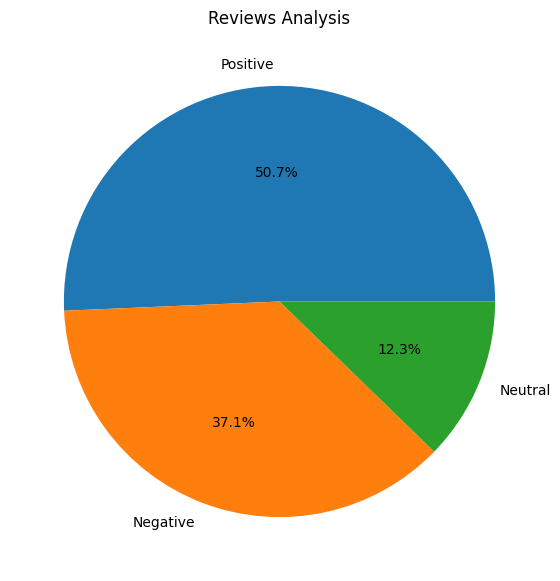

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index , autopct='%1.1f%%')

In [ ]:
!pip install top2vec[sentence_encoders]

In [ ]:
from top2vec import Top2Vec

In [ ]:
model = Top2Vec(list(dataframe["Lemma"].to_numpy()))

2023-08-22 12:44:42,593 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-08-22 12:44:43,234 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-08-22 12:44:54,928 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-08-22 12:45:20,709 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-08-22 12:45:20,789 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

2

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)
topic_sizes, topic_nums, topic_words

(array([1453,  447]),
 array([0, 1]),
 array([['open', 'like', 'clear', 'two', 'lot', 'know', 'right',
         'upgrade', 'whilst', 'complete', 'none', 'couple', 'pack', 'big',
         'must', 'work', 'apart', 'new', 'turn', 'continue', 'sell',
         'etc', 'appear', 'almost', 'either', 'three', 'decline',
         'within', 'recently', 'mean', 'however', 'throughout', 'full',
         'everything', 'thing', 'ever', 'something', 'need', 'journey',
         'service', 'felt', 'available', 'real', 'certainly', 'busy',
         'lack', 'awful', 'terrible', 'see', 'rather'],
        ['request', 'possible', 'try', 'state', 'online', 'already',
         'someone', 'able', 'pick', 'talk', 'next', 'finally', 'today',
         'matter', 'receive', 'pm', 'find', 'agent', 'city', 'reach',
         'within', 'decide', 'lose', 'different', 'stand', 'website',
         'message', 'week', 'stop', 'answer', 'fault', 'waste',
         'understand', 'add', 'help', 'issue', 'since', 'connect', 'upon

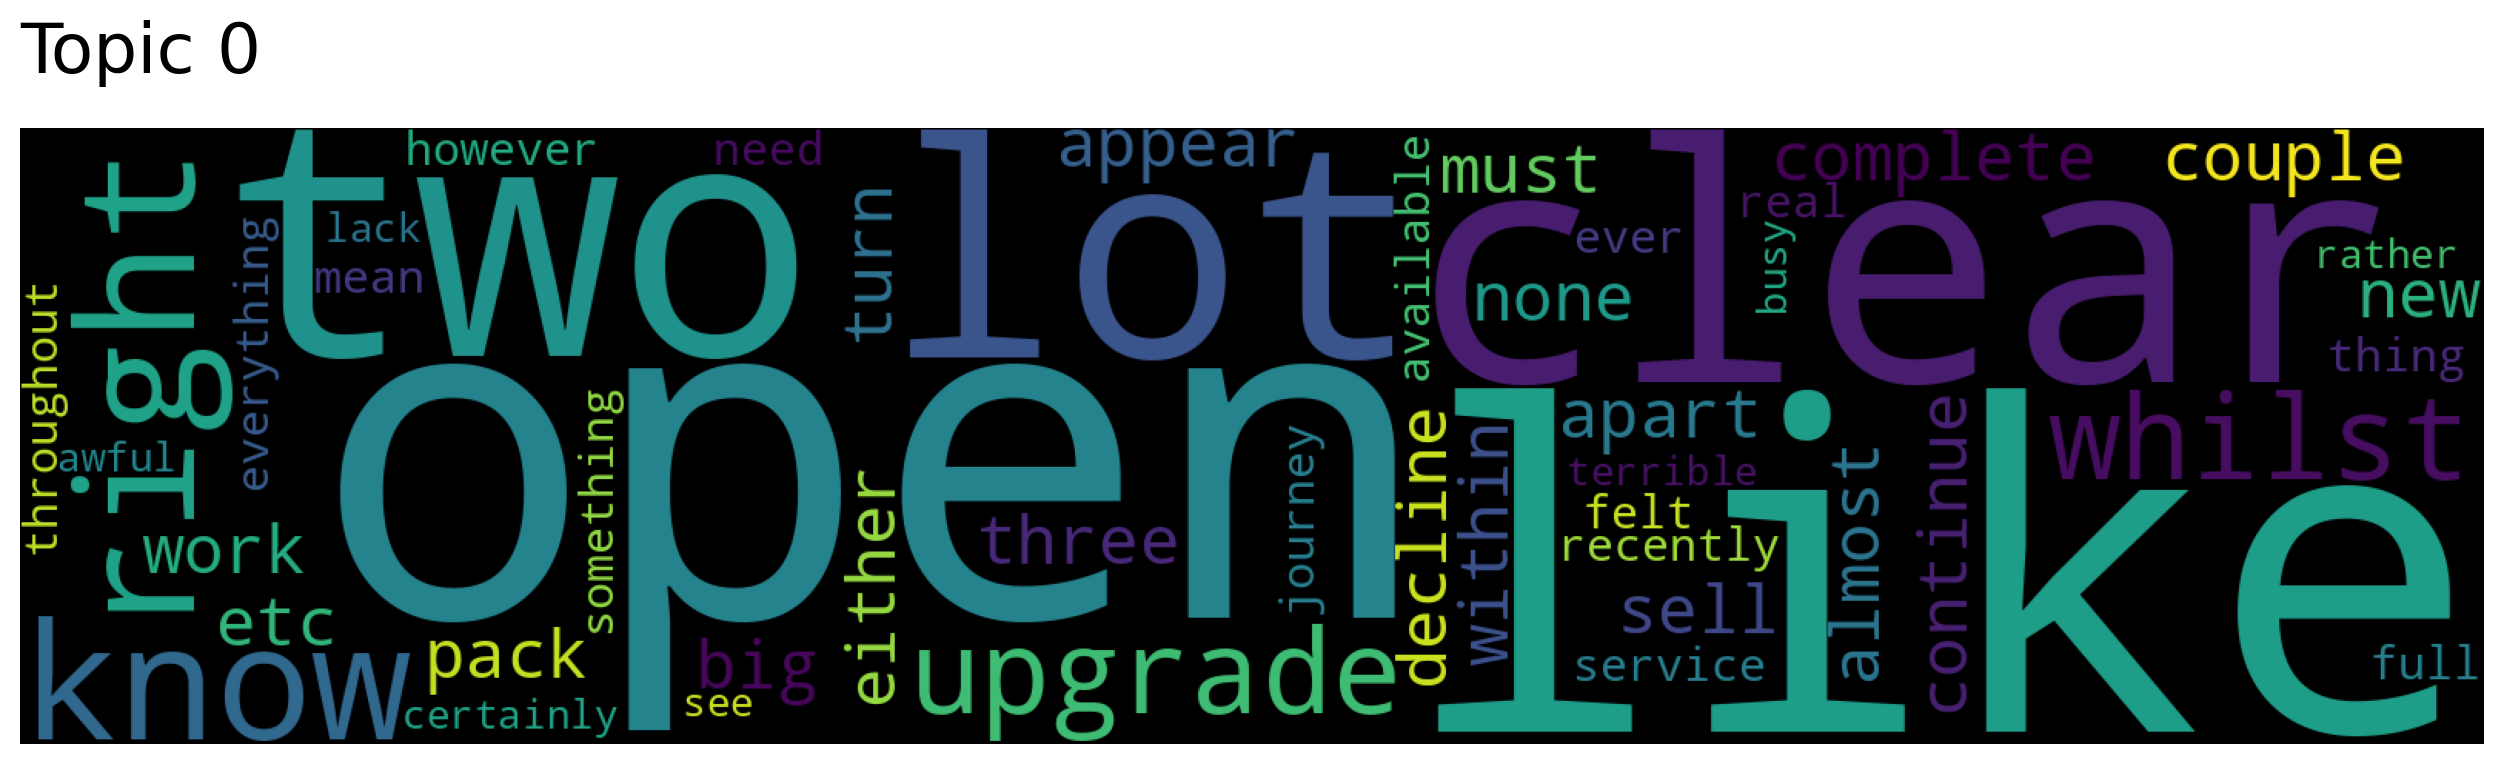

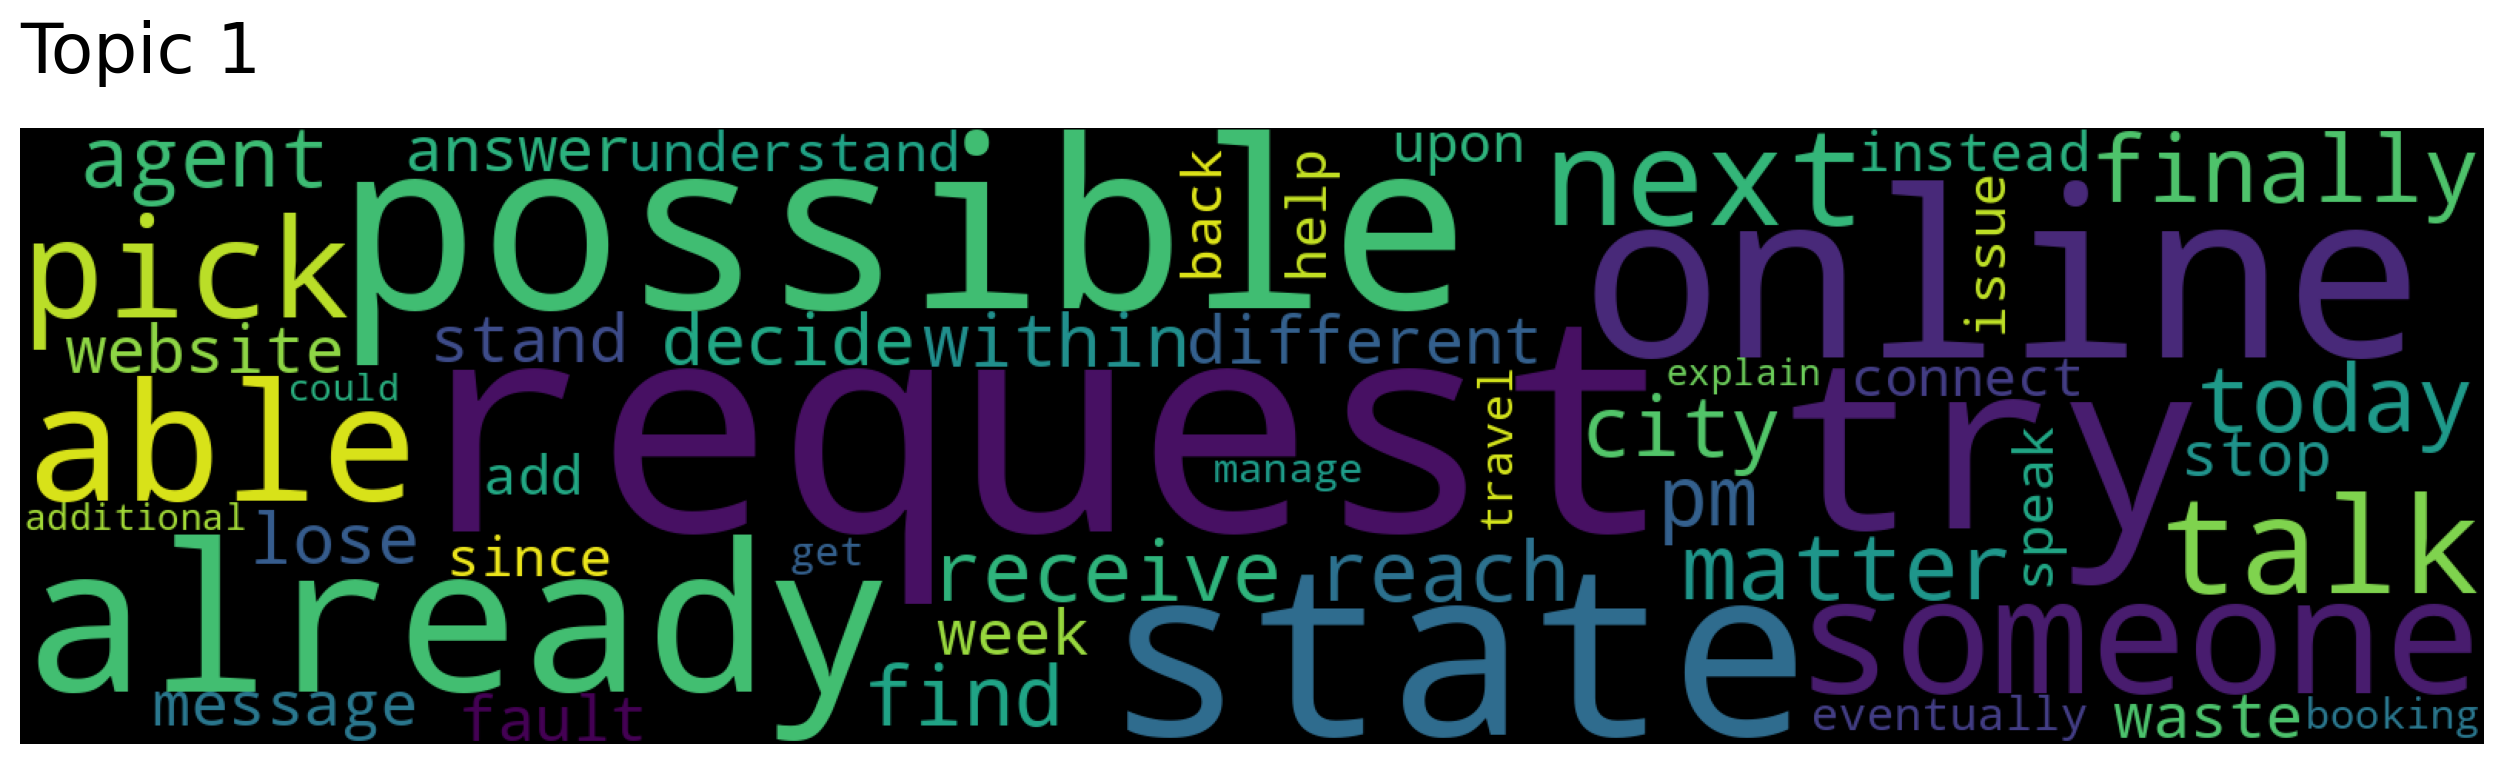

In [ ]:
for topic in topic_nums[0:2]:
    model.generate_topic_wordcloud(topic)

For topics related to professional

In [ ]:
words, word_scores = model.similar_words(keywords=["professional"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

enjoy 0.8826012178365203
south 0.8731596249581963
attentive 0.8724382918874732
rather 0.8721484572661719
plenty 0.8587060018821573
bit 0.8579045982480515
job 0.8479616062735738
friendly 0.8465475789889967
ahead 0.8449188714039366
slightly 0.8443868057135967


For reviews related to professional

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["professional"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1359, Score: 0.9164469838142395
-----------
  Gatwick Malaga First flight BA new home South Terminal London Gatwick Upon arrival check bit disappointed see staff available deal Business class passenger result minute wait sort bag However Fast Track Customs efficient make early minor irritation New lounge South Terminal spacious food beverages usual good quality although sadly reduction towards cheap airline show crack Malaga uneventful onboard food well present good quality arrive min ahead schedule due fortunate wind complain Overall flight quality excellent
-----------

Document: 1715, Score: 0.8957103490829468
-----------
  London Heathrow Pisa return fly route often house Tuscany fly British Airways Club Europe FAs well lounge welcome benefit book far ahead enough get reasonable deal plus Avious point aside little benefit fly say Ryanair trip start Northern lounge change busy fruit coffee breakfast option group highly unhealthy look bacon bap drip fat place year ago BA pr

Task 2 - Predict customer buying behaviour

In [ ]:
import os, types
import pandas as pd
data = "/content/customer_booking.xlsx"
df_data_0 = pd.read_excel(data)
df_data_0.head()



,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
booking = df_data_0

In [ ]:
booking.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import os

# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data-Prep
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Model Buidling and metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
booking.isnull().sum()

In [ ]:
# Separating categorical and numerical columns
booking_categorical = booking.select_dtypes(include="object")
booking_numerical = booking.select_dtypes(exclude="object")

In [ ]:
booking_categorical.head()

In [ ]:
for col in booking_categorical:
    print(booking_categorical[col].value_counts())
    print("\n")

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64


RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64


Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64


AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64


Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64




In [ ]:
booking_categorical.columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [ ]:
columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for value in columns:
    booking_categorical=pd.get_dummies(booking_categorical, columns=[value],drop_first=True)

In [ ]:
booking_categorical.shape

(50000, 910)

In [ ]:
booking_categorical.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
booking_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


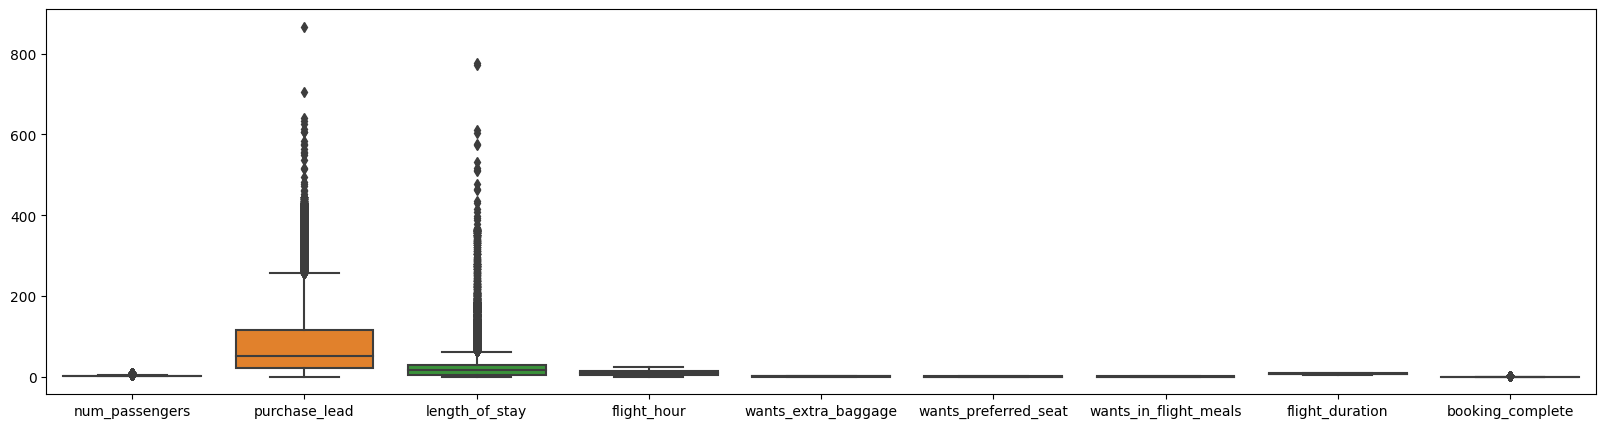

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data = booking_numerical)
plt.show()

In [ ]:
booking_numerical.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
# Replacing outliers with median
#function to return a list of index of outliers
column_list = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']
for feature in column_list:
    Q1= booking_numerical[feature].quantile(0.25)
    Q3 =booking_numerical[feature].quantile(0.75)
    IQR = Q3 - Q1


    lower_limit = Q1 - 1.5 * IQR

    upper_limit = Q3 + 1.5 * IQR

    median = booking_numerical[feature].median()

    booking_numerical[feature] = np.where(booking_numerical[feature]< lower_limit, median,booking_numerical[feature])
    booking_numerical[feature] = np.where(booking_numerical[feature]> upper_limit, median,booking_numerical[feature])

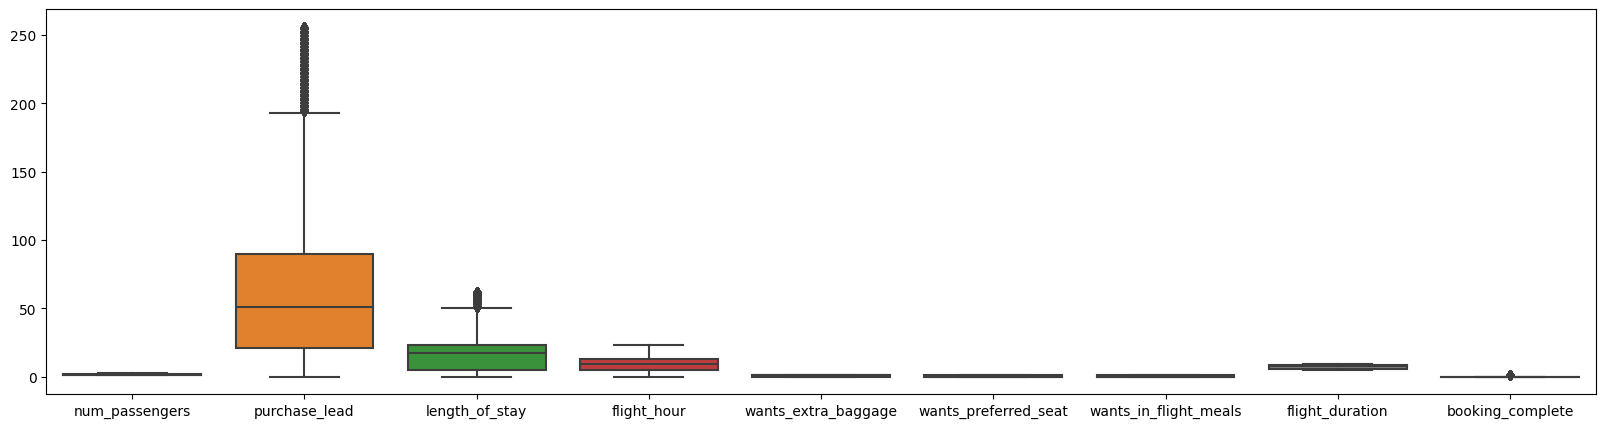

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data = booking_numerical)
plt.show()

In [ ]:
booking_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,51.0,19.0,7.0,1.0,0.0,0.0,5.52,0
1,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0
2,2.0,243.0,22.0,17.0,1.0,1.0,0.0,5.52,0
3,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0
4,2.0,68.0,22.0,15.0,1.0,0.0,1.0,5.52,0


In [ ]:
# combining numerical and categorical column data
bookings = pd.concat([booking_categorical,booking_numerical] , axis =1)

In [ ]:
bookings.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,0,1,0,1,0,0,0,0,0,...,0,2.0,51.0,19.0,7.0,1.0,0.0,0.0,5.52,0
1,0,0,1,0,1,0,0,0,0,0,...,0,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0
2,0,0,1,0,0,0,0,0,1,0,...,0,2.0,243.0,22.0,17.0,1.0,1.0,0.0,5.52,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0
4,0,0,1,0,0,0,0,0,1,0,...,0,2.0,68.0,22.0,15.0,1.0,0.0,1.0,5.52,0


In [ ]:
# Separating dependent and independent variables
X = bookings.drop(["booking_complete"] , axis=1)
y = bookings["booking_complete"]

In [ ]:
# Using StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.246182,0.231165,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.767907,0.305232,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,2.945705,0.453365,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.501916,1.119966,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,0.036433,0.453365,1.096267,0.703747,-0.649919,1.158082,-1.174175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.645168,-0.731702,-0.012257,0.703747,-0.649919,1.158082,-1.107368
49996,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,2.574671,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.751282,-0.731702,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368
49997,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.695041,-0.731702,2.389544,-1.420965,-0.649919,1.158082,-1.107368
49998,-0.355785,-0.08832,0.100808,2.274053,-0.362669,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.844661,-0.731702,0.357251,0.703747,-0.649919,1.158082,-1.107368


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [ ]:
y.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
print(X.shape)
print(y.shape)

(50000, 918)
(50000,)


In [ ]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_scaled, y)
print(x_smote.shape)
print(y_smote.shape)

(85044, 918)
(85044,)


In [ ]:
x_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.246182,0.231165,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.767907,0.305232,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,2.945705,0.453365,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.501916,1.119966,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,0.036433,0.453365,1.096267,0.703747,-0.649919,1.158082,-1.174175


In [ ]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

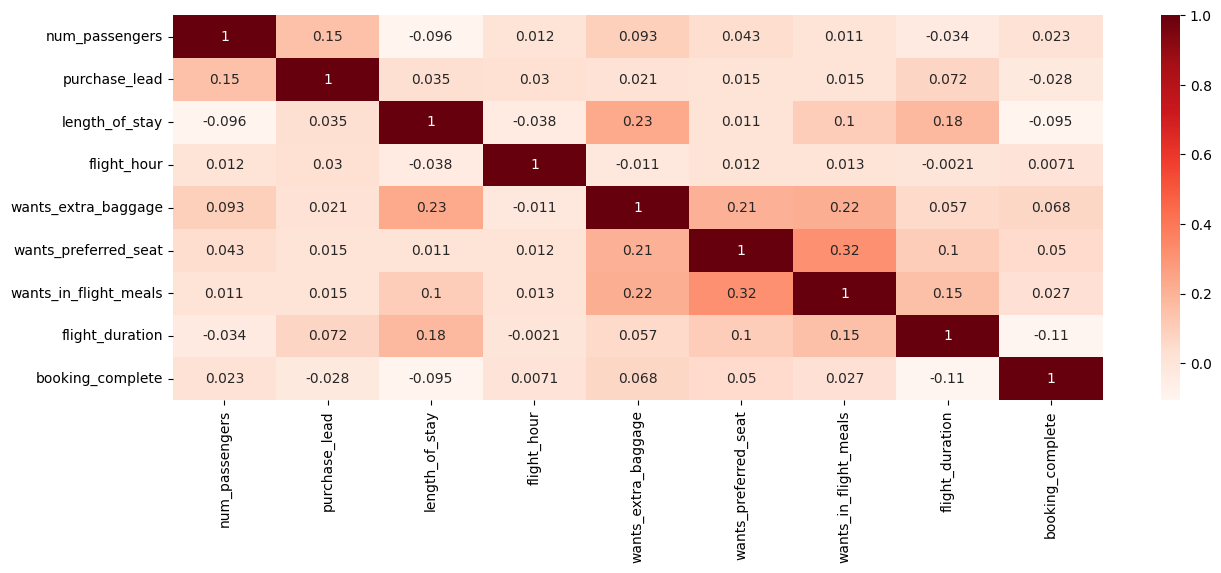

In [ ]:
# Plotting heatmap
plt.figure(figsize=(15,5))
sns.heatmap(booking_numerical.corr() , annot=True, cmap="Reds")
plt.show()

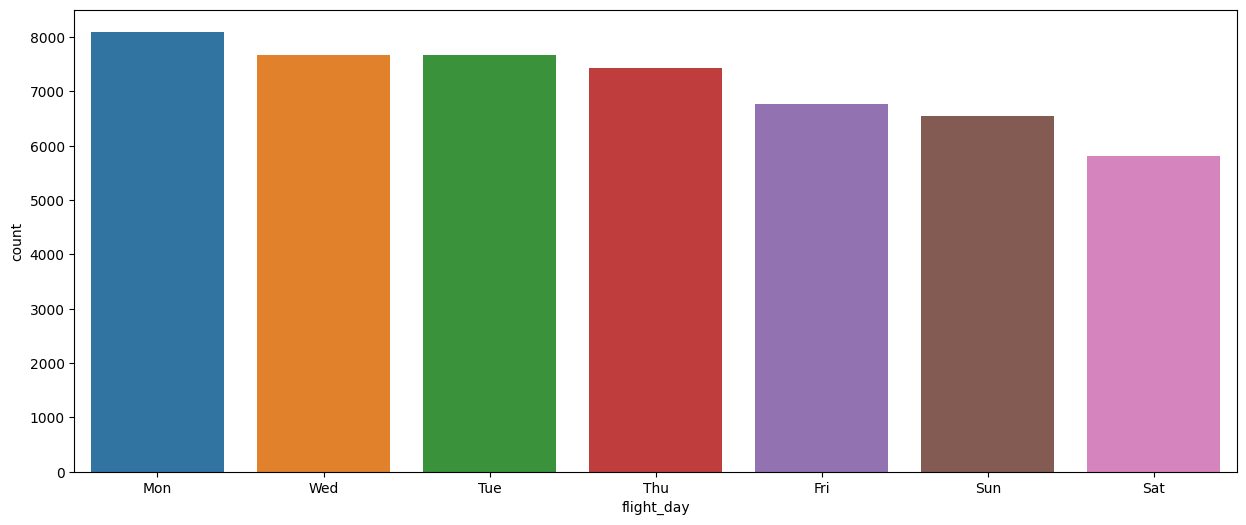

In [ ]:
# No. of flights on each day of the week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day", data=booking, order=booking["flight_day"].value_counts().index)
plt.show()

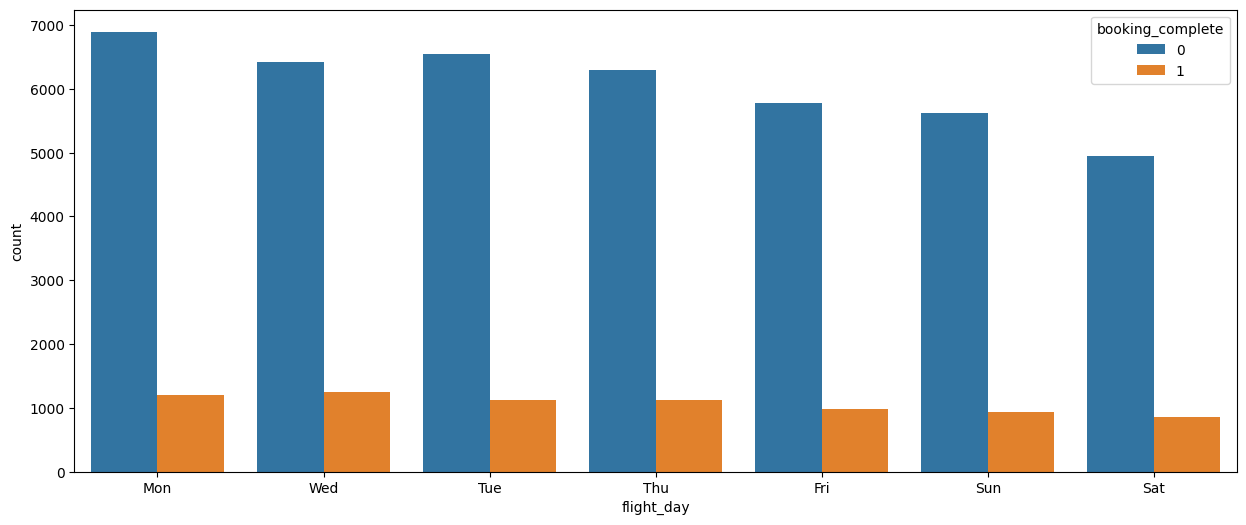

In [ ]:
# No. of flights on each day of the week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day",hue = "booking_complete", data=booking, order=booking["flight_day"].value_counts().index)
plt.show()

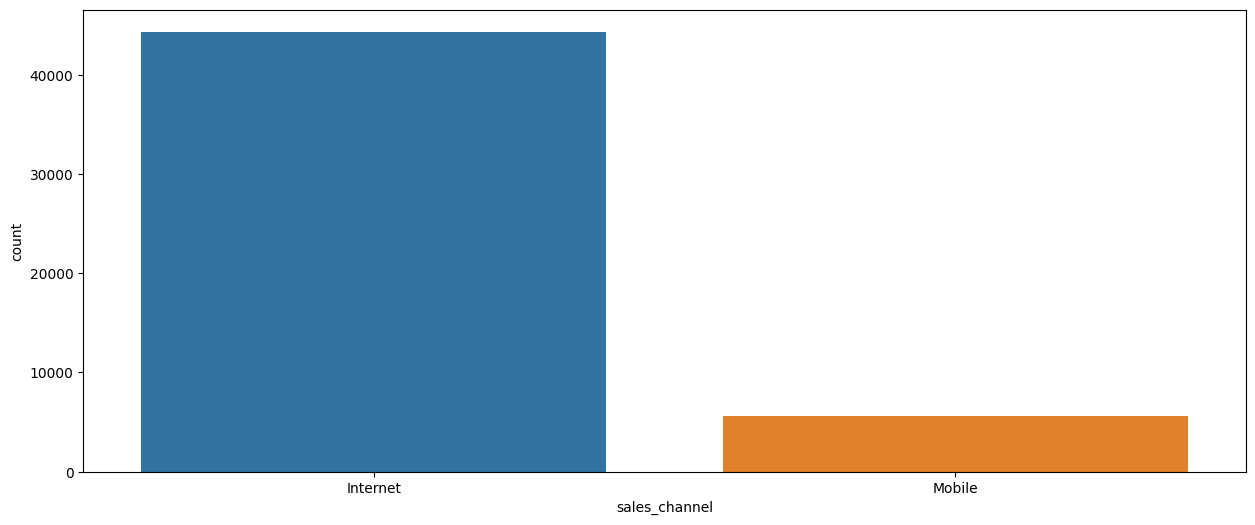

In [ ]:
# Frequently used Booking channel
plt.figure(figsize=(15,6))
sns.countplot(x = "sales_channel", data=booking, order=booking["sales_channel"].value_counts().index)
plt.show()

Text(0, 0.5, 'Count')

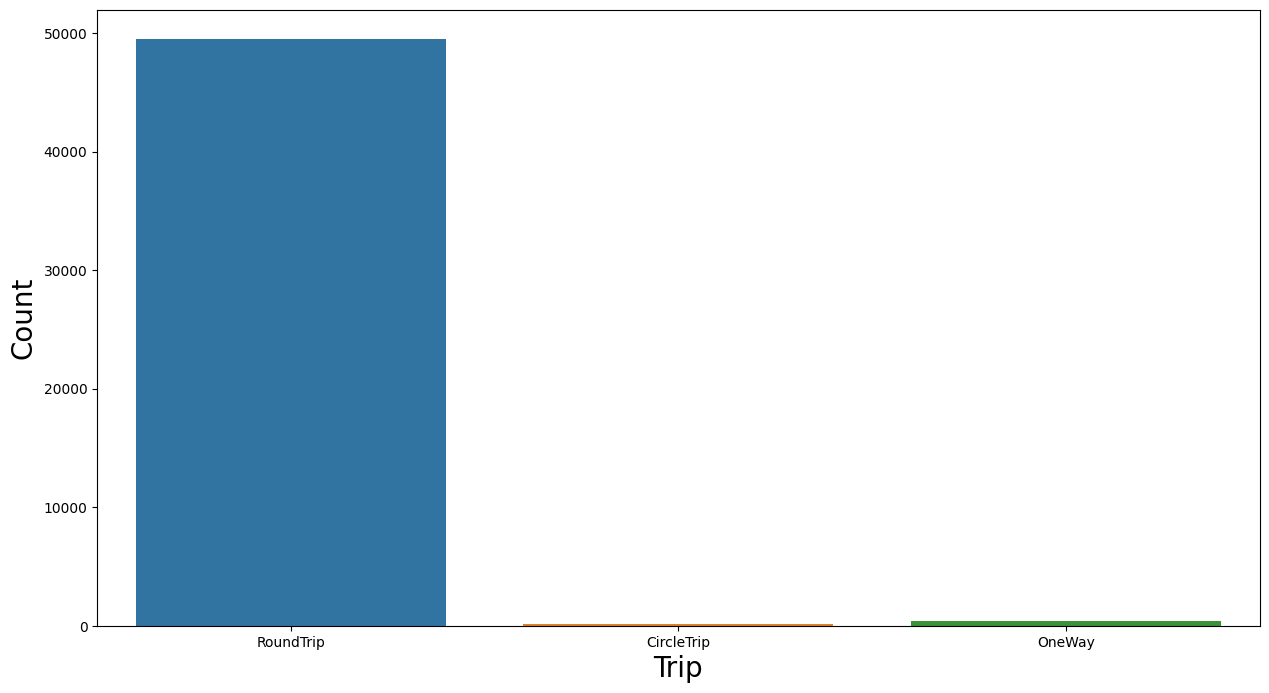

In [ ]:
# Most frequently opted trip type
plt.figure(figsize=(15,8))
plots = sns.countplot(x="trip_type",  data=booking)
plt.xlabel("Trip",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

In [ ]:
booking["booking_origin"].value_counts(ascending=False)

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

Text(0, 0.5, 'Count')

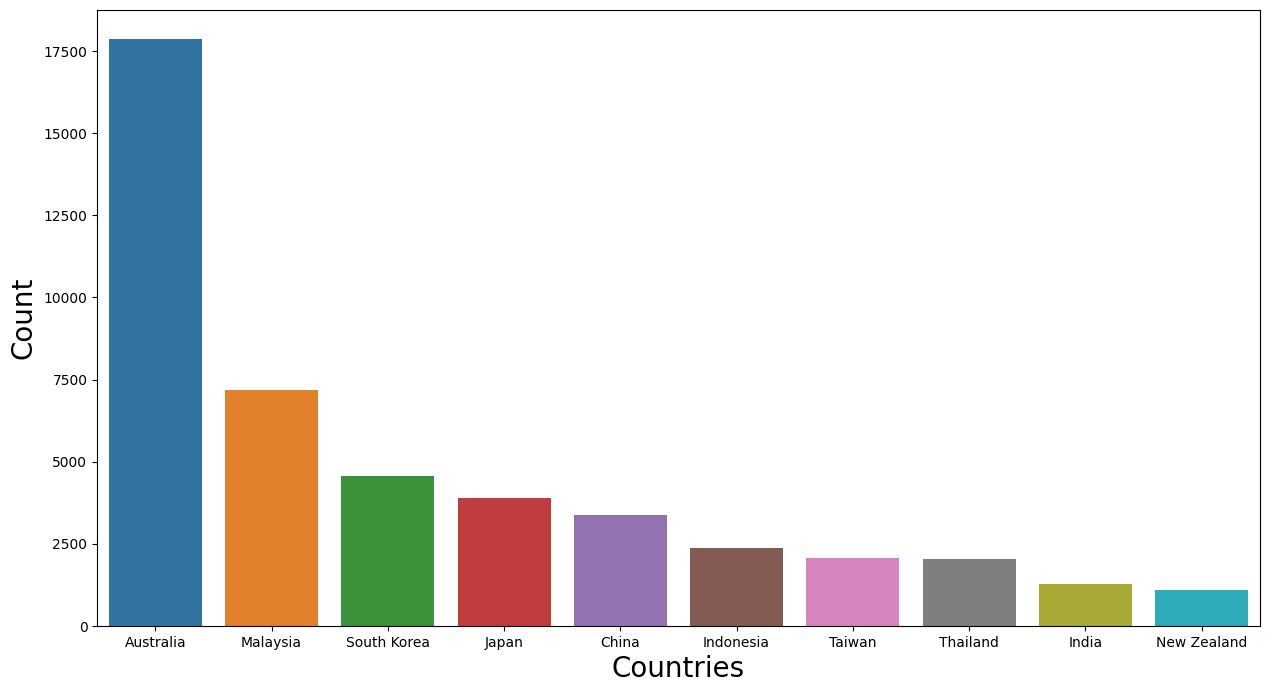

In [ ]:
# Top 10 Countries in flight bookings
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=booking ,order=booking.booking_origin.value_counts().iloc[:10].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

Text(0, 0.5, 'Count')

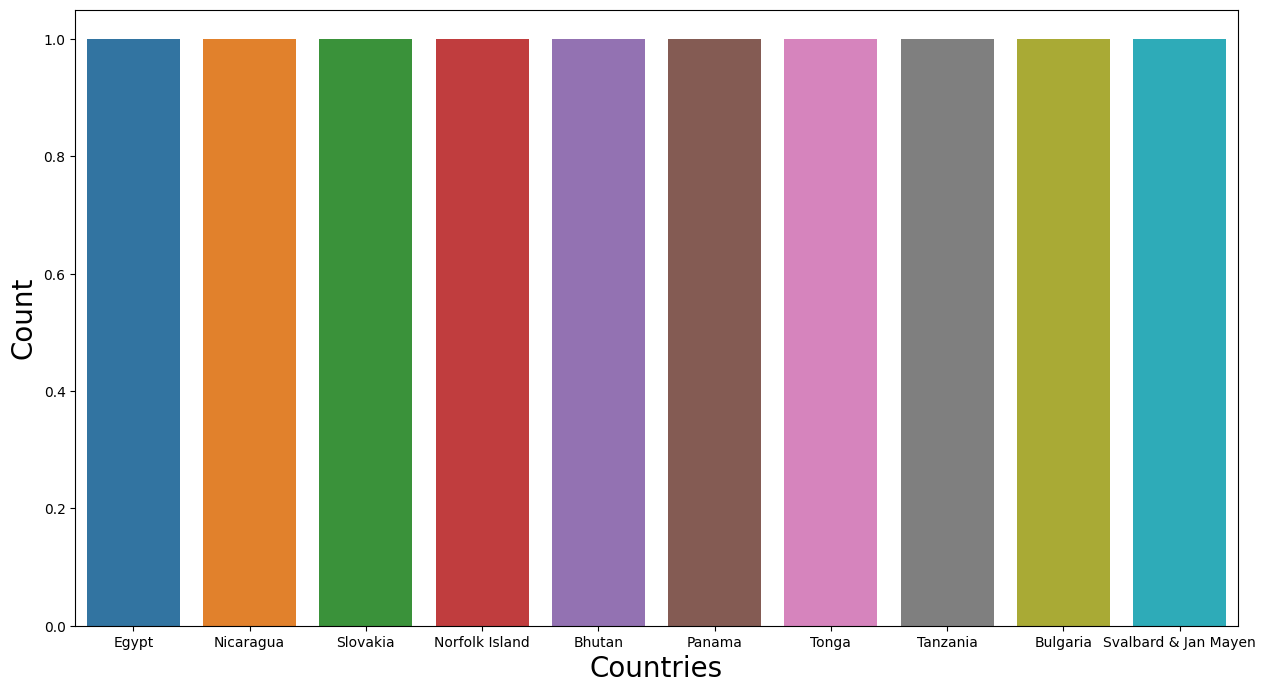

In [ ]:
# Bottom 10 Countries in flight bookings
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=booking ,order=booking.booking_origin.value_counts().iloc[-10:].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

Text(0, 0.5, 'Count')

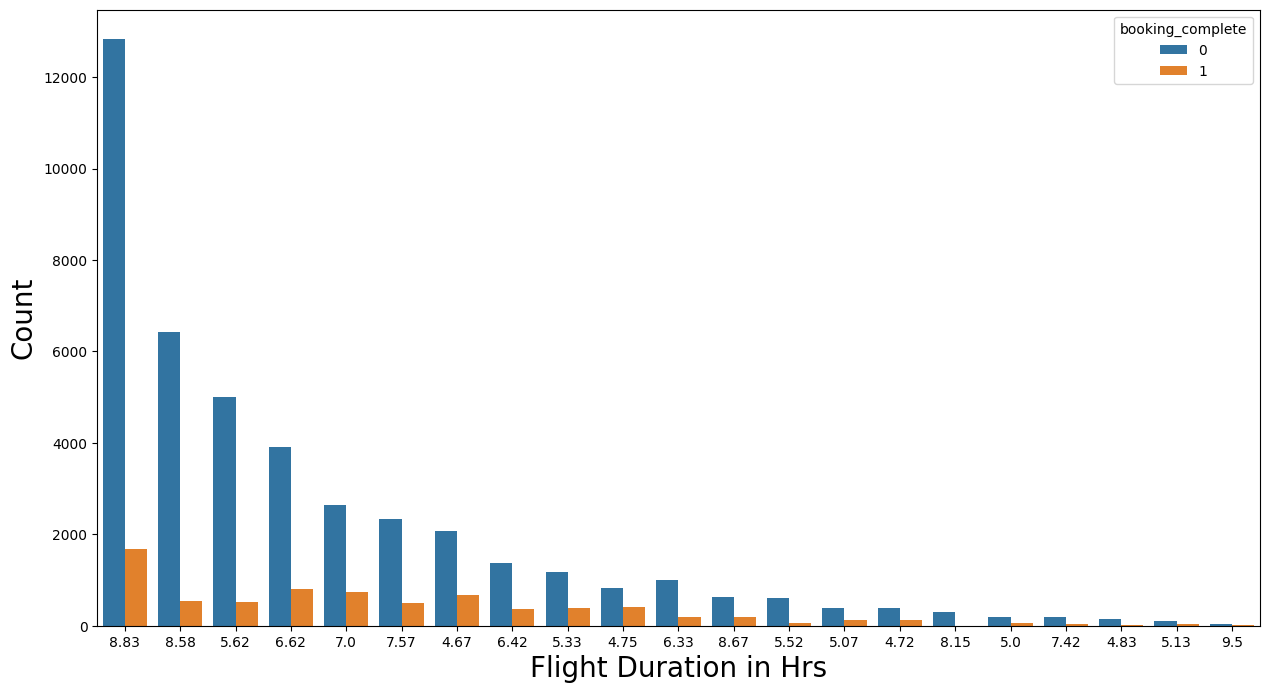

In [114]:
# Flight hour and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="flight_duration", hue="booking_complete" , data=booking ,order=booking.flight_duration.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in Hrs",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.25,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(63783, 918)
(21261, 918)
(63783,)
(21261,)


In [ ]:
# using random forest classifier
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_predtrain = rforest.predict(x_train)
y_predtest = rforest.predict(x_test)

In [ ]:
print(confusion_matrix(y_train, y_predtrain))
print(confusion_matrix(y_test, y_predtest))

[[31886     6]
 [    2 31889]]
[[10008   622]
 [ 1100  9531]]


In [ ]:
print(classification_report(y_train, y_predtrain))
print(classification_report(y_test, y_predtest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31892
           1       1.00      1.00      1.00     31891

    accuracy                           1.00     63783
   macro avg       1.00      1.00      1.00     63783
weighted avg       1.00      1.00      1.00     63783

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10630
           1       0.94      0.90      0.92     10631

    accuracy                           0.92     21261
   macro avg       0.92      0.92      0.92     21261
weighted avg       0.92      0.92      0.92     21261



In [ ]:
print(accuracy_score(y_train, y_predtrain))
print(accuracy_score(y_test, y_predtest))

0.9998745747299437
0.9190066318611543
